<a href="https://colab.research.google.com/github/HP3-16/DimensionalityReduction/blob/main/PCA_and_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA**

##**MNIST Dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn # scikitlearn for ML
import scipy #for eigen value calculation
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/My Drive/mnist.csv")

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# the shape of the dataset:
# 42,000 rows and 785 columns initially
df.shape

(42000, 785)

In [6]:
# Slicing 


# separate out the label from the data as l
l = df['label'] 

In [7]:
# separating data alone as d
d = df.drop("label",axis = 1)

In [8]:
# data d has 42k rows and 784 cols
# labels is a col. vecor of 42k x 1
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


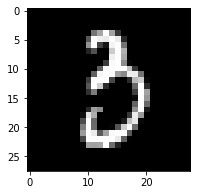

3


In [9]:
# trying to visualize the image from the dataset given
plt.figure(figsize=(3,3))
idx = 150
# we try to plot what is at d[100]
#d.iloc[idx].to_numpy().reshape(28,28)
grid_data = d.iloc[idx].to_numpy().reshape(28,28) # reshapes the row no. 100 into a matrix (by using to_numpy()) of shape 28x28 basically 1d to 2d
plt.imshow(grid_data,interpolation = 'none', cmap = 'gray')
plt.show()

print(l[idx])

In [10]:
labels = l.head(15000)
data = d.head(15000)

In [11]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


## **Manually doing PCA**

In [12]:
sample_data = standardized_data
#covariance matrix = A transpose . A
covariance_matrix = np.matmul(sample_data.T, sample_data)

print(covariance_matrix.shape)

(784, 784)


In [13]:
from scipy.linalg import eigh
values, vectors = eigh(covariance_matrix, eigvals=(782,783)) #eigh calculates eigen values and vectors in ascending order
print("Shape of the eigen vector = ",vectors.shape)


Shape of the eigen vector =  (784, 2)


In [14]:
vectors = vectors.T

In [15]:
new_coordinates = np.matmul(vectors,sample_data.T)
print(new_coordinates.shape)

(2, 15000)


In [16]:
#print(np.vstack((new_coordinates,labels)).T)

In [17]:
new_coordinates = np.vstack((new_coordinates,labels)).T
df = pd.DataFrame(data = new_coordinates,columns=("feature_1","feature_2","label"))
df.head()

,feature_1,feature_2,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


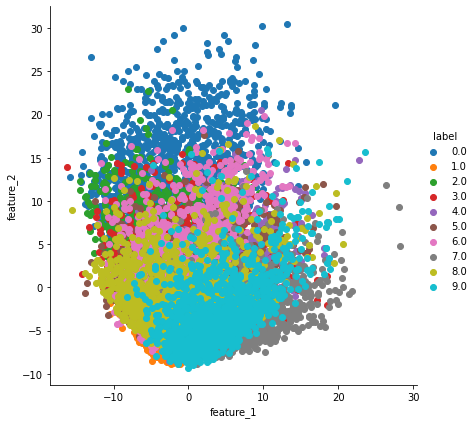

In [18]:
sns.FacetGrid(df,hue="label",height=6).map(plt.scatter,'feature_1','feature_2').add_legend() 
plt.show()

## **PCA using ScikitLearn**

In [19]:
from sklearn import decomposition
pca = decomposition.PCA()

In [20]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print(pca_data.shape)

(15000, 2)


In [21]:
pca_data = np.vstack((pca_data.T,labels)).T


In [22]:
pca_df = pd.DataFrame(data = pca_data,columns=("feature_1","feature_2","label"))

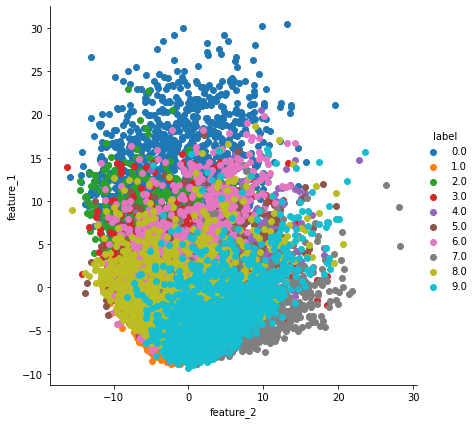

In [23]:
sns.FacetGrid(pca_df,hue='label',height=6).map(plt.scatter,'feature_2','feature_1').add_legend()
plt.show()

## **PCA for Dimensionality Reduction**

In [24]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

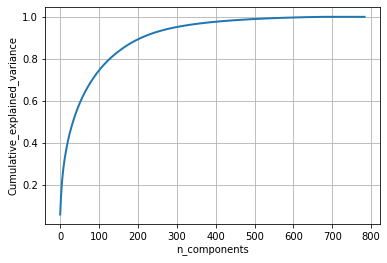

In [25]:
plt.figure(1,figsize=(6,4))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

## about 200 components for a 90% explained variance

# **t-SNE**

In [26]:
from sklearn.manifold import TSNE

In [38]:
data_1000 = standardized_data[0:1000,:]
data_15000 = standardized_data
labels_1000 = labels[0:1000]

In [28]:
TSNE_model = TSNE(n_components = 2,random_state=0)

In [39]:
tsne_data = TSNE_model.fit_transform(data_15000)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


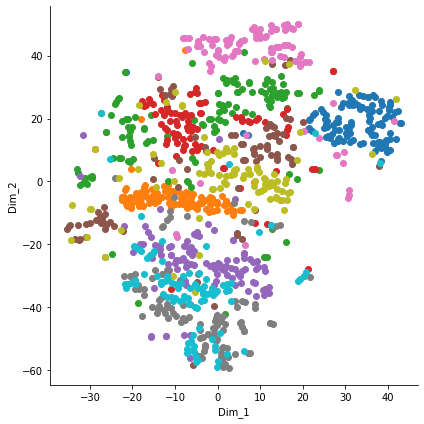

In [36]:
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim_1","Dim_2","Label"))


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


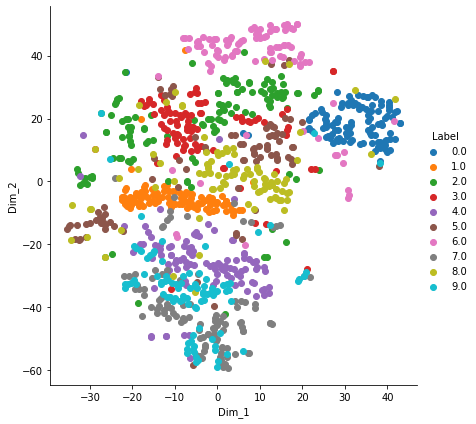

In [37]:
sns.FacetGrid(tsne_df, hue='Label',size = 6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()